<a href="https://colab.research.google.com/github/VivekMuraleedharanGit/fastai_learning/blob/main/Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation 

I this notebook i try to create a segmentatio model to prediction every pixel from the image using fastai module

In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 4.1MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

The images folder contains the images, and the corresponding segmentation masks of labels are in the labels folder. The codes file contains the corresponding integer to class (the masks have an int value for each pixel).

In [7]:
codes= np.loadtxt(path/'codes.txt',dtype= str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [9]:
(path/"labels").ls()[1:3]

(#2) [Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08085_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06300_P.png')]

It seems the segmentation masks have the same base names as the images but with an extra _P, so we can define a label function:



In [19]:
#label function for the predictor 

def label_func(fn):
  return path/'labels'/f'{fn.stem}_P{fn.suffix}'


In [25]:

#using datablock api 

camvid = DataBlock(blocks=(ImageBlock,MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter= RandomSplitter(),
                   batch_tfms= aug_transforms(size=(120,160)))

In [26]:
dls= camvid.dataloaders(path/'images',path= path,bs=8)

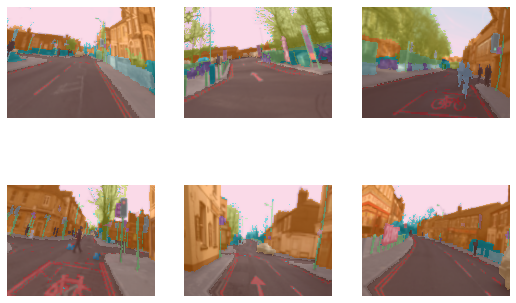

In [27]:
dls.show_batch(max_n=6)

In [29]:
#modelling
learn= unet_learner(dls,resnet50)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,time
0,2.951318,2.126000,00:40


epoch,train_loss,valid_loss,time
0,1.850390,1.816423,00:26
1,1.629634,1.651346,00:23
2,1.522446,1.255095,00:23
3,1.404885,1.169369,00:23
4,1.302584,1.053034,00:23
5,1.211309,1.038746,00:23


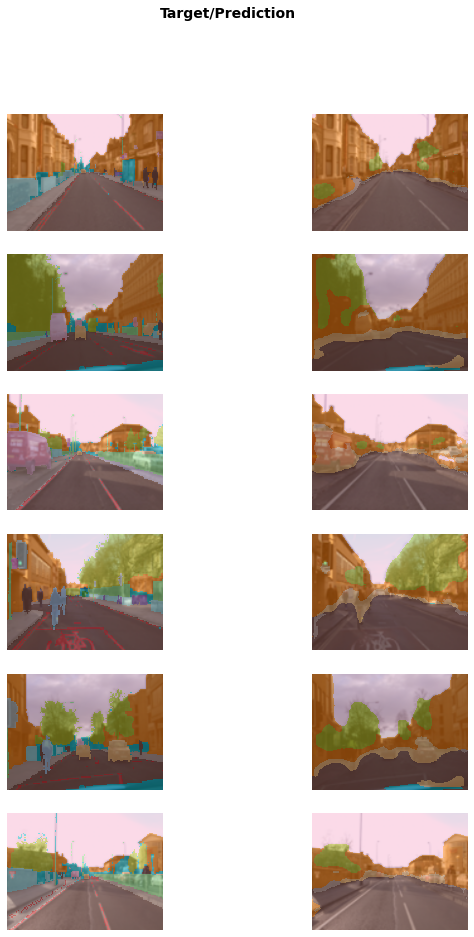

In [31]:
learn.show_results(max_n=6, figsize=(10,15))

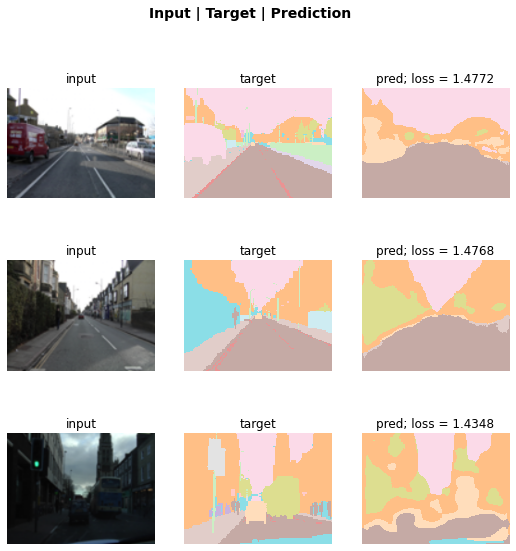

In [32]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

Most of the prediction loss happening to the images with no proper lighting